In [1]:
import numpy as np

In [2]:
def f(x):
    #return x[0]**2+x[1]**2
    return (x[0]-2)**2+(x[1]-3**2)

def df(x):
    return np.array([2*(x[0]-2),2*(x[1]-3)]) # 2 dimension

In [3]:
x0=np.array([-3.0, 8.0]) # initial guess
lr=0.1 # learning rate
iter1=1000 # 반복 횟수 많을수록 정확 (100번은 많이 벗어남, 10000번은 거의 근접)
x=x0
history=np.ones([iter1, 3])
for i in range(0,iter1):
    x = x - lr * df(x) # next x
    history[i, 0:2]=np.array(x)
    history[i,2]=f(x)


In [7]:
print(history[::10,2])

[14.         -5.38603583 -5.95175638 -5.99502372 -5.99946803 -5.99994291
 -5.99999387 -5.99999934 -5.99999993 -5.99999999 -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6.         -6.         -6.         -6.         -6.
 -6.         -6. 

In [30]:
print(history[:,2])

[4.67200000e+01 2.99008000e+01 1.91365120e+01 1.22473677e+01
 7.83831532e+00 5.01652180e+00 3.21057395e+00 2.05476733e+00
 1.31505109e+00 8.41632698e-01 5.38644927e-01 3.44732753e-01
 2.20628962e-01 1.41202536e-01 9.03696229e-02 5.78365586e-02
 3.70153975e-02 2.36898544e-02 1.51615068e-02 9.70336437e-03]


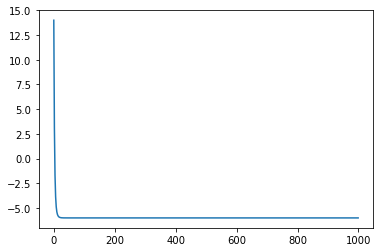

In [5]:
import matplotlib.pyplot as plt
plt.plot(history[:,2])

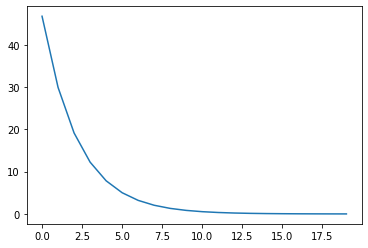

In [31]:
import matplotlib.pyplot as plt
plt.plot(history[:,2]) # f(x) value는 iteration이 진행될수록 0으로 수렴해야 함
# 더 이상 개선이 없을 때의 x 값

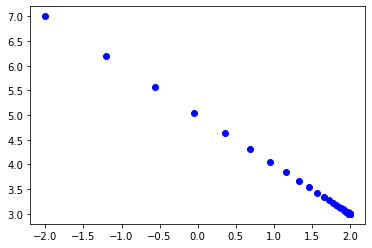

In [6]:
plt.plot(history[:,0], history[:,1], "bo")

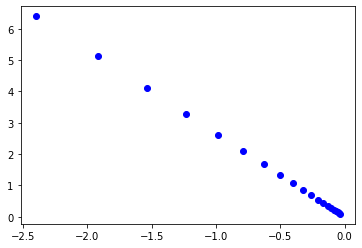

In [33]:
plt.plot(history[:,0], history[:,1], "bo")

In [23]:
np .sum(X, axis=2)

array([[ 54,  70],
       [ 86, 102],
       [118, 134]])

In [14]:
X = np.array([ [[0,1,2,3],[4,5,6,7]], 
              [[8,9,10,11],[12,13,14,15]],
              [[16,17,18,19],[20,21,22,23]]     ])

In [15]:
X[0,:,:]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [16]:
X[0,0,:]

array([0, 1, 2, 3])

In [5]:
X.shape

(3, 2, 4)

In [8]:
X[1,1,3]

15

In [17]:
np.sum(X, axis=0)

array([[24, 27, 30, 33],
       [36, 39, 42, 45]])

In [18]:
np.sum(X, axis=2)

array([[ 6, 22],
       [38, 54],
       [70, 86]])

In [32]:
import numpy as np
X1 = np . array ([[7 ,8 ,9]])
X2 = np . array ( [ [ 7 ] , [ 8 ] , [ 9 ] ] )
X3 = np . array ([7 ,8 ,9])
print(X1*X2)

[[49 56 63]
 [56 64 72]
 [63 72 81]]


In [33]:
print(X2*X3)

[[49 56 63]
 [56 64 72]
 [63 72 81]]


In [34]:
print(X1*X3)

[[49 64 81]]


## Poisson Regression with boston data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Data manipulation

In [2]:
from sklearn import datasets
boston = datasets.load_boston()
X_train = boston['data']
y_train = boston['target'] #number of car accidents
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
y_train[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [4]:
y = np.round_(y_train, decimals=0, out=None) #make into integers

In [5]:
print(X_train.shape, y.shape)

(506, 13) (506,)


* X_train does not contain the column of 1's. In the following, we add the column of 1's into the model matrix.

In [6]:
my_ones = np.ones([506,1])
X = np.concatenate((my_ones, X_train), axis=1)
print(X.shape)

(506, 14)


In [7]:
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()) #Find W based on MLE
poisson_results = poisson_model.fit();

In [8]:
print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  506
Model:                            GLM   Df Residuals:                      492
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.0
Date:                Wed, 21 Oct 2020   Deviance:                       362.69
Time:                        11:21:00   Pearson chi2:                     389.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7780      0.232     16.268      0.0

In [9]:
yhat = poisson_results.mu #prediction for each observation

In [15]:
# yhat = poisson_results.predict(X)

In [16]:
np.mean((y_train-yhat)**2)  #Calculation of MSE

16.725663858781825

* Calculate MSE again!

In [11]:
W = poisson_results.params # Estimated parameters

In [12]:
my_yhat = np.exp(np.dot(X, W) )
print(my_yhat.shape)

np.mean((y_train-my_yhat)**2)

(506,)


16.725663858781825

### Draw plot

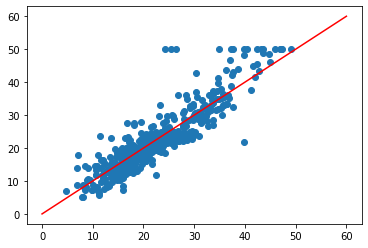

In [66]:
import matplotlib.pyplot as plt
plt.plot(yhat,y_train, 'o')
plt.plot([0, 60], [0,60], 'r-')